<h1>CAPSTONE PROJECT NOTEBOOK </h1>

<h1>Introduction : Business Problem </h1>
Manhattan, often referred to by residents of the New York City area as the city, is the most densely populated of the five boroughs of New York City, and coextensive with the County of New York, one of the original counties of the U.S. state of New York. Manhattan serves as the city's economic and administrative center, cultural identifier,] and historical birthplace. Manhattan Island is divided into three informally bounded components, each aligned with the borough's long axis: Lower, Midtown, and Upper Manhattan. 
The project will give an insight on the similarities and dissimilarities by categorizing the clusters of the subdistricts of Upper Manhattan. From the analysis, we can draw conclusions to opt for the optimal location for a new venue of a particular category. 
This project will be helpful to any general entrepreneur but may be most useful for entrepreneurs on the food and beverage sector given that location can be the deciding factor for a success. 

<h1>Data </h1>
To analyze the subdistricts of Upper Manhattan, the list of subdistrict is obtained from  
List of Manhattan neighborhoods website. 
Various venue queries have been made by the Foursquare API based on the locations of the subdistricts. The data is cleaned and with the processed data, we cluster the neighborhoods. The commonality clusters can then provide insight on which type of venue will thrive better on which cluster. K-means clustering algorithm will be used to find pattern between the subdistricts. 
To summarize the data needed: 
1.Subdistricts of Upper Manhattan 
2.Locations of subdistricts 
3.Trending venues based on the subdistrict 
4.Venue Categories 
 
 

<h1>Data Gathering</h1>
Initialize required library

In [224]:
# Load needed libraries for data collection

# HTML request and scraper library
import requests
from bs4 import BeautifulSoup

# Geocoding library
#!conda install -c conda-forge geopy --yes # Unquote to install geopy
from geopy.geocoders import ArcGIS # module to convert an address into latitude and longitude values

# Library for data analysis
import pandas as pd
from pandas.io.json import json_normalize # Function to transform json
import numpy as np

#!conda install -c conda-forge folium=0.5.0 --yes # Unquote to install folium
import folium # map plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import collapsible JSON for exploration
from IPython.display import JSON

# k-means for categorization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


# Pretty print
from pprint import pprint

Parse Jakarta's subdistrict from the wiki page.

In [225]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_Manhattan_neighborhoods")
soup = BeautifulSoup(page.content, 'html.parser')

In [227]:
y=[]
for i in soup.find('table',class_="wikitable sortable").tbody.find_all('tr'):
    z=i.find_all('td')
    for k in z:
        y.append(k.text.strip("\n"))
    
   
    
    
subdistrict=y[::2]

In [228]:
subdistrict

['Upper Manhattan',
 'Marble Hill',
 'Inwood',
 'Fort George (part of Washington Heights)',
 'Washington Heights',
 'Hudson Heights (part of Washington Heights)',
 'West Harlem',
 'Hamilton Heights (part of Harlem)',
 'Manhattanville',
 'Morningside Heights',
 'Central Harlem',
 'Harlem',
 "St. Nicholas Historic District, aka Strivers' Row (Central Harlem)",
 'Astor Row (Central Harlem)',
 'Sugar Hill (Central Harlem)',
 'Marcus Garvey Park, Mount Morris Historical District',
 'Le Petit Senegal (Little Senegal)',
 'East Harlem (Spanish Harlem)',
 'Upper East Side',
 'Lenox Hill',
 'Carnegie Hill',
 'Yorkville',
 'Upper West Side',
 'Manhattan Valley, Bloomingdale District',
 'Lincoln Square (once San Juan Hill)']

In [229]:
argc=ArcGIS()
subdist_coord={}

def get_coord_jkt(addr):
    dict={}
    for i in addr:
        try:
            location=argc.geocode(i+",Manhattan")
            print(i, "queried, returned as",location[0])
            dict[i]=location[1]
        except Exception as E:
            print("ERROR: occured at", i, E)
    print("Query complete, total query:", len(addr))
    return dict

subdistcoord = get_coord_jkt(subdistrict)
pprint(subdistcoord)   

Upper Manhattan queried, returned as Manhattan, Pedro-Rodríguez, Ávila, Castilla y León
Marble Hill queried, returned as Marble Hill Ave, Bronx, New York, 10463
Inwood queried, returned as Indiana Ln, Manhattan, Kansas, 66502
Fort George (part of Washington Heights) queried, returned as Fort George Hl, New York, 10040
Washington Heights queried, returned as Washington Heights NP
Hudson Heights (part of Washington Heights) queried, returned as Hudson Heights Bar & Grill
West Harlem queried, returned as Harlem Dr W, New York, 10037
Hamilton Heights (part of Harlem) queried, returned as Hamilton Heights Casablanca Hotel
Manhattanville queried, returned as Manhattan, Pedro-Rodríguez, Ávila, Castilla y León
Morningside Heights queried, returned as Manhattan Ave, New York, 10027
Central Harlem queried, returned as Central Park N, New York, 10026
Harlem queried, returned as Harlem Dr W, New York, 10037
St. Nicholas Historic District, aka Strivers' Row (Central Harlem) queried, returned as Man

In [230]:
# Put the dictionary into data frame
manhattan_df =pd.DataFrame(subdistcoord).T

In [231]:
manhattan_df.columns=['Latitude','Longitude']
manhattan_df.reset_index(inplace=True)
#Convert index to its own column under Subdistrict
manhattan_df.columns=['Subdistrict', 'Latitude', 'Longitude']
manhattan_df

,Subdistrict,Latitude,Longitude
0,Upper Manhattan,40.949530,-4.758900
1,Marble Hill,40.876014,-73.909419
2,Inwood,39.202606,-96.611399
3,Fort George (part of Washington Heights),40.859173,-73.926478
4,Washington Heights,40.851110,-73.939040
5,Hudson Heights (part of Washington Heights),40.849720,-73.936200
6,West Harlem,40.815704,-73.934446
7,Hamilton Heights (part of Harlem),40.825610,-73.948430
8,Manhattanville,40.949530,-4.758900
9,Morningside Heights,40.808850,-73.954033


In [232]:
# Draw the map centered on Jakarta
manhat = get_coord_jkt(["Manhattan"])
jktmap = folium.Map(location=manhat["Manhattan"], zoom_start=11) 

# Add a red circle marker to represent the center of Jakarta
folium.CircleMarker(
    manhat["Manhattan"],
    radius=10,
    color='red',
    popup='Jakarta',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
    ).add_to(jktmap)
for i,j in subdistcoord.items():
    folium.CircleMarker(
        j,
        radius=5,
        color='blue',
        popup=i,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(jktmap) 
jktmap

Manhattan queried, returned as Manhattan, New York
Query complete, total query: 1


<h1>FourSquare call</h1>

In [233]:
CLIENT_ID='YP1ORTPE0GHRHVYXIW3EUAPXULZOCH2432BXECO1HD51RVA2'
CLIENT_SECRET='WCLHHAORXCS0WMFOIKGG1FB2O1CHRUZT5FDSEVXEAS1ME2DE'
VERSION = '20180604'
LIMIT = 100
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: YP1ORTPE0GHRHVYXIW3EUAPXULZOCH2432BXECO1HD51RVA2
CLIENT_SECRET:WCLHHAORXCS0WMFOIKGG1FB2O1CHRUZT5FDSEVXEAS1ME2DE


In [234]:
# Check Harlem area recommended venues
latitude =manhattan_df['Latitude'][11]
longitude =manhattan_df['Longitude'][11]
radius = 1500

In [235]:
#Import collapsible JSON for exploration
from IPython.display import JSON

# define URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

# send GET request and get recommended venues
results = requests.get(url).json()
print('There are {} recommended venues.'.format(len(results['response']['groups'][0]['items'])))

JSON(results)

There are 100 recommended venues.


<IPython.core.display.JSON object>

Process and convert JSON response into a dataframe.

In [236]:
# Get relevant part of FourSquare's explore call JSON
items = results['response']['groups'][0]['items']
dataframe = json_normalize(items) # flatten JSON

# Filter columns
features=['venue.name','venue.categories']+[col for col in dataframe.columns if col.startswith('venue.location')]+['venue.id']
dataframe_filtered = dataframe.loc[:,features]
dataframe_filtered


C:\Users\Mainak\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,venue.name,venue.categories,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.location.neighborhood,venue.id
0,Harlem Tennis Center,"[{'id': '4e39a956bd410d7aed40cbc3', 'name': 'T...",40 W 143rd St,Lenox,40.817936,-73.935623,"[{'label': 'display', 'lat': 40.81793560487509...",267,10037,US,New York,NY,United States,"[40 W 143rd St (Lenox), New York, NY 10037, Un...",NaN,4b5c5be8f964a520612c29e3
1,NYPL Schomburg Center for Research in Black Cu...,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",515 Malcolm X Blvd,at W 135th St,40.814575,-73.940928,"[{'label': 'display', 'lat': 40.81457529607425...",560,10037,US,New York,NY,United States,"[515 Malcolm X Blvd (at W 135th St), New York,...",NaN,4a55218af964a520b8b31fe3
2,Harlem Cycle,"[{'id': '52f2ab2ebcbc57f1066b8b49', 'name': 'C...",2350 Adam Clayton Powell Jr Blvd,b/w 137th and 138th,40.817201,-73.942592,"[{'label': 'display', 'lat': 40.81720130749785...",706,10030,US,New York,NY,United States,[2350 Adam Clayton Powell Jr Blvd (b/w 137th a...,NaN,56ffcb8d498e9f8a61d39ff5
3,Belle Harlem,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",2363 Adam Clayton Powell Jr Blvd,btwn 138th and 139th St,40.816890,-73.942680,"[{'label': 'display', 'lat': 40.81689, 'lng': ...",706,10030,US,New York,NY,United States,[2363 Adam Clayton Powell Jr Blvd (btwn 138th ...,NaN,57f9286fcd10f93045e82291
4,Bill's Place,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",148 W 133rd St,Bet. 7th Ave & Lenox Ace,40.813366,-73.943701,"[{'label': 'display', 'lat': 40.81336639422447...",821,10030,US,New York,NY,United States,"[148 W 133rd St (Bet. 7th Ave & Lenox Ace), Ne...",NaN,549e1a59498e58bd4f653d19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Londel's Restaurant,"[{'id': '4bf58dd8d48988d14f941735', 'name': 'S...",2620 Frederick Douglass Blvd,Btwn 139th & Frederick Douglass,40.819390,-73.944440,"[{'label': 'display', 'lat': 40.81939003271195...",936,10030,US,New York,NY,United States,[2620 Frederick Douglass Blvd (Btwn 139th & Fr...,NaN,4ad22304f964a5209bdf20e3
96,Olive Garden,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",100 W 125th St,NaN,40.807909,-73.946230,"[{'label': 'display', 'lat': 40.80790939349583...",1318,10027,US,New York,NY,United States,"[100 W 125th St, New York, NY 10027, United St...",NaN,584ca4c2730a923792498b85
97,Crêpe Master,"[{'id': '52e81612bcbc57f1066b79f2', 'name': 'C...",2029 5th Ave,E 125th St,40.806536,-73.941795,"[{'label': 'display', 'lat': 40.806536, 'lng':...",1193,10035,US,New York,NY,United States,"[2029 5th Ave (E 125th St), New York, NY 10035...",NaN,58161a8338fa18c2119047de
98,Riverside Drive Running Path,"[{'id': '4bf58dd8d48988d165941735', 'name': 'S...",NaN,NaN,40.827738,-73.942124,"[{'label': 'display', 'lat': 40.82773784865658...",1487,NaN,US,NaN,New York,United States,"[New York, United States]",NaN,50214d39e4b0e010016aca57


In [237]:
# Filter the category for each row
dataframe_filtered['venue.categories']=[dataframe_filtered['venue.categories'][i][0]['name'] for i in range(len(dataframe))]

In [238]:
#Filter the columns
dataframe_filtered.columns=[col.split('.')[-1] for col in dataframe_filtered.columns]

In [239]:
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Harlem Tennis Center,Tennis Court,40 W 143rd St,Lenox,40.817936,-73.935623,"[{'label': 'display', 'lat': 40.81793560487509...",267,10037,US,New York,NY,United States,"[40 W 143rd St (Lenox), New York, NY 10037, Un...",NaN,4b5c5be8f964a520612c29e3
1,NYPL Schomburg Center for Research in Black Cu...,Library,515 Malcolm X Blvd,at W 135th St,40.814575,-73.940928,"[{'label': 'display', 'lat': 40.81457529607425...",560,10037,US,New York,NY,United States,"[515 Malcolm X Blvd (at W 135th St), New York,...",NaN,4a55218af964a520b8b31fe3
2,Harlem Cycle,Cycle Studio,2350 Adam Clayton Powell Jr Blvd,b/w 137th and 138th,40.817201,-73.942592,"[{'label': 'display', 'lat': 40.81720130749785...",706,10030,US,New York,NY,United States,[2350 Adam Clayton Powell Jr Blvd (b/w 137th a...,NaN,56ffcb8d498e9f8a61d39ff5
3,Belle Harlem,American Restaurant,2363 Adam Clayton Powell Jr Blvd,btwn 138th and 139th St,40.816890,-73.942680,"[{'label': 'display', 'lat': 40.81689, 'lng': ...",706,10030,US,New York,NY,United States,[2363 Adam Clayton Powell Jr Blvd (btwn 138th ...,NaN,57f9286fcd10f93045e82291
4,Bill's Place,Jazz Club,148 W 133rd St,Bet. 7th Ave & Lenox Ace,40.813366,-73.943701,"[{'label': 'display', 'lat': 40.81336639422447...",821,10030,US,New York,NY,United States,"[148 W 133rd St (Bet. 7th Ave & Lenox Ace), Ne...",NaN,549e1a59498e58bd4f653d19


Visualize venues around the subdistrict to verify.

In [240]:
# Generate map centred around Gambir
venues_map=folium.Map(location=[latitude, longitude], zoom_start=15)

# Add center of Gambir subdistrict as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Harlem',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

for lat,lan,venue,cat in zip(dataframe_filtered.lat,dataframe_filtered.lng,dataframe_filtered.name,dataframe_filtered.categories):
    folium.CircleMarker(
    [lat, lan],
    radius=5,
    popup=venue+','+cat,
    fill=True,
    color='blue',
    fill_color='blue',
    fill_opacity=0.6
    ).add_to(venues_map)

venues_map

Now to get all the venues from each subdistricts.

In [241]:
def getNearbyVenues(names,latitudes,longitudes,radius):
    venue_list=[]
    for nam,lat,lan in zip(names,latitudes,longitudes):
        #print(nam)
    # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lan, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        for v in results:
            venue_list.append([nam,lat,lan,v['venue']['name'], v['venue']['location']['lat'],v['venue']['location']['lng'],
                           v['venue']['categories'][0]['name']])
        
    nearby_venues = pd.DataFrame(venue_list)
    nearby_venues.columns = ['Subdistrict', 
                  'Subdistrict Latitude', 
                  'Subdistrict Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return nearby_venues
    
    
    
        

In [242]:
manhattan_venues_cat = getNearbyVenues(names=manhattan_df['Subdistrict'],
                                 latitudes=manhattan_df['Latitude'],
                                 longitudes=manhattan_df['Longitude'],
                                 radius = 1500)

manhattan_venues_cat.head(10)

,Subdistrict,Subdistrict Latitude,Subdistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Upper Manhattan,40.949530,-4.758900,El Cristo De Los Pinares,40.949499,-4.758556,Brewery
1,Marble Hill,40.876014,-73.909419,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876014,-73.909419,Sam's Pizza,40.879435,-73.905859,Pizza Place
3,Marble Hill,40.876014,-73.909419,Arturo's,40.874412,-73.910271,Pizza Place
4,Marble Hill,40.876014,-73.909419,Tibbett Diner,40.880404,-73.908937,Diner
5,Marble Hill,40.876014,-73.909419,Starbucks,40.877531,-73.905582,Coffee Shop
6,Marble Hill,40.876014,-73.909419,The Bronx Public,40.878377,-73.903481,Pub
7,Marble Hill,40.876014,-73.909419,El Malecon,40.879338,-73.904457,Caribbean Restaurant
8,Marble Hill,40.876014,-73.909419,Garden Gourmet Market,40.881350,-73.903389,Gourmet Shop
9,Marble Hill,40.876014,-73.909419,Baker Athletic Complex,40.872061,-73.914876,Athletics & Sports


In [243]:
print("shape of venue list of all subdistrict",manhattan_venues_cat.shape)
#Check how many venues were returned for each subdistrict.
manhattan_venues_cat.groupby('Subdistrict').count()

shape of venue list of all subdistrict (2236, 7)


,Subdistrict Latitude,Subdistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Subdistrict,,,,,,
Astor Row (Central Harlem),100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,100,100,100,100,100,100
East Harlem (Spanish Harlem),100,100,100,100,100,100
Fort George (part of Washington Heights),100,100,100,100,100,100
Hamilton Heights (part of Harlem),100,100,100,100,100,100
Harlem,100,100,100,100,100,100
Hudson Heights (part of Washington Heights),100,100,100,100,100,100
Inwood,34,34,34,34,34,34


Drop subdistrict with less than 10 venues. These sub-districts are considered to be not popular for our purpose.

In [244]:
x=manhattan_venues_cat.groupby('Subdistrict').count()['Venue'] < 10
b=manhattan_venues_cat.groupby('Subdistrict').count()[x].index
c=[manhattan_venues_cat.iloc[i]['Subdistrict'] not in b for i in range(len(manhattan_venues_cat))]
manhattan_venues=manhattan_venues_cat[c]

In [245]:

manhattan_venues_cat.head()

,Subdistrict,Subdistrict Latitude,Subdistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Upper Manhattan,40.949530,-4.758900,El Cristo De Los Pinares,40.949499,-4.758556,Brewery
1,Marble Hill,40.876014,-73.909419,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876014,-73.909419,Sam's Pizza,40.879435,-73.905859,Pizza Place
3,Marble Hill,40.876014,-73.909419,Arturo's,40.874412,-73.910271,Pizza Place
4,Marble Hill,40.876014,-73.909419,Tibbett Diner,40.880404,-73.908937,Diner


In [246]:
manhattan_venues.groupby('Subdistrict').count().head()

,Subdistrict Latitude,Subdistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Subdistrict,,,,,,
Astor Row (Central Harlem),100,100,100,100,100,100
Carnegie Hill,100,100,100,100,100,100
Central Harlem,100,100,100,100,100,100
East Harlem (Spanish Harlem),100,100,100,100,100,100
Fort George (part of Washington Heights),100,100,100,100,100,100


In [247]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 223 uniques categories.


Visualize the venues on the map.

In [248]:
map_venue = folium.Map(location=manhat["Manhattan"], zoom_start=11) # generate map centred around the Conrad Hotel

# add a red circle marker to represent center of Jakarta
folium.CircleMarker(
    manhat["Manhattan"],
    radius=10,
    color='red',
    popup='Manhattan',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
    ).add_to(map_venue)

# add the subdistritcs as blue circle markers
for subdist, coord in subdistcoord.items():
    folium.CircleMarker(
        coord,
        radius=5,
        color='blue',
        popup=subdist,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(map_venue)

# add venues to the map as green circle markers
for lat, lng, label, cat in zip(manhattan_venues["Venue Latitude"], manhattan_venues["Venue Longitude"], 
                                manhattan_venues["Venue"], manhattan_venues["Venue Category"]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label +", " + cat,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(map_venue)


# display map
map_venue

<h1>Analysis</h1>

In [249]:
# one hot encoding
manhattan_onehot=pd.get_dummies(manhattan_venues[['Venue Category']],prefix="", prefix_sep="")
# add neighborhood column back to dataframe
manhattan_onehot['Subdistrict'] = manhattan_venues['Subdistrict']
# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot =manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Subdistrict,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group the encoded dataframe.

In [250]:
manhattan_grouped = manhattan_onehot.groupby('Subdistrict').mean().reset_index()
manhattan_grouped.head()

,Subdistrict,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Astor Row (Central Harlem),0.02,0.01,0.00,0.00,0.0,0.00,0.02,0.01,0.00,...,0.0,0.01,0.0,0.01,0.02,0.03,0.0,0.00,0.02,0.00
1,Carnegie Hill,0.00,0.00,0.00,0.00,0.0,0.01,0.02,0.00,0.00,...,0.0,0.00,0.0,0.00,0.01,0.00,0.0,0.01,0.00,0.02
2,Central Harlem,0.02,0.01,0.00,0.00,0.0,0.00,0.02,0.01,0.00,...,0.0,0.01,0.0,0.01,0.02,0.03,0.0,0.00,0.02,0.00
3,East Harlem (Spanish Harlem),0.00,0.02,0.01,0.01,0.0,0.01,0.01,0.03,0.01,...,0.0,0.00,0.0,0.00,0.00,0.02,0.0,0.00,0.01,0.00
4,Fort George (part of Washington Heights),0.00,0.02,0.00,0.00,0.0,0.00,0.02,0.00,0.00,...,0.0,0.00,0.0,0.00,0.04,0.03,0.0,0.00,0.01,0.00


In [251]:
manhattan_grouped.shape

(23, 224)

In [252]:
num_top_venues = 10

for hood in manhattan_grouped['Subdistrict']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Subdistrict'] == hood].T.reset_index()
    temp.columns=['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp['freq']= temp['freq'].round(2)
    
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

----Astor Row (Central Harlem)----
                venue  freq
0                Park  0.10
1         Coffee Shop  0.04
2            Fountain  0.04
3          Playground  0.04
4  Mexican Restaurant  0.03
5           Wine Shop  0.03
6                Café  0.03
7               Plaza  0.03
8         Pizza Place  0.03
9              Bakery  0.03
----Carnegie Hill----
                      venue  freq
0                   Theater  0.13
1                     Hotel  0.07
2              Concert Hall  0.06
3     Performing Arts Venue  0.04
4                     Plaza  0.04
5                 Jazz Club  0.03
6                       Gym  0.03
7                       Zoo  0.02
8  Mediterranean Restaurant  0.02
9        Mexican Restaurant  0.02
----Central Harlem----
                venue  freq
0                Park  0.10
1         Coffee Shop  0.04
2            Fountain  0.04
3          Playground  0.04
4  Mexican Restaurant  0.03
5           Wine Shop  0.03
6                Café  0.03
7             

Define a function to return the most common venues.

In [253]:
# Adapted from previous exercise
num_top_venues = 10
columns = ['Subdistrict']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Subdistrict'] = manhattan_grouped['Subdistrict']
for ind in np.arange(manhattan_grouped.shape[0]):
     neighborhoods_venues_sorted.iloc[ind, 1:] =manhattan_grouped.iloc[ind,1:].sort_values(ascending=False).index[0:num_top_venues]
    

In [254]:
neighborhoods_venues_sorted.head()

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astor Row (Central Harlem),Park,Fountain,Coffee Shop,Playground,Wine Shop,Mexican Restaurant,Bakery,Pizza Place,Plaza,Café
1,Carnegie Hill,Theater,Hotel,Concert Hall,Plaza,Performing Arts Venue,Gym,Jazz Club,Zoo,Bakery,Spa
2,Central Harlem,Park,Fountain,Coffee Shop,Playground,Wine Shop,Mexican Restaurant,Bakery,Pizza Place,Plaza,Café
3,East Harlem (Spanish Harlem),Park,Café,Southern / Soul Food Restaurant,Coffee Shop,Tennis Court,Mexican Restaurant,Theater,Arts & Crafts Store,Italian Restaurant,Bar
4,Fort George (part of Washington Heights),Mexican Restaurant,Latin American Restaurant,Park,Pizza Place,Café,Deli / Bodega,Wine Bar,Restaurant,Spanish Restaurant,Tapas Restaurant


<h1>Cluster Subdistricts</h1>
Run k-means to cluster the neighborhood into 5 clusters.

C:\Users\Mainak\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (16) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


[0.2042009494709, 0.23892977515688585, 0.3593927997909883, 0.39239617951072764, 0.43504176141450157, 0.5701939952959367, 0.5592521357832647, 0.47826086605848256, 0.47826086605848256]
[ 0  5  0  6  3  1  6  8  4  2  1  9  7  3 10 10  2  0 11 11  8  6  2]


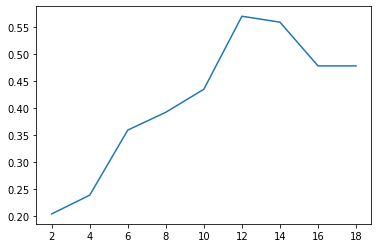

In [255]:
import matplotlib.pyplot as plt
# set number of clusters
kclusters=list(range(2,20,2))
score1=[]

manhattan_grouped_clustering=manhattan_grouped.drop('Subdistrict',axis=1)
for i in kclusters:
    # run k-means clustering
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0).fit_predict(manhattan_grouped_clustering)
    # check cluster labels generated for each row in the dataframe
    score=silhouette_score(manhattan_grouped_clustering, kmeans)
    score1.append(score)
print(score1)
plt.plot(kclusters,score1)

n=12
kmeans = KMeans(n_clusters=n, init = 'k-means++', random_state=0).fit(manhattan_grouped_clustering)
print(kmeans.labels_)

In [256]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
manhattan_merged = manhattan_df
# drop NA from the excluded subdistrict
c=[manhattan_merged.iloc[i]['Subdistrict'] not in b for i in range(len(manhattan_merged))]
manhattan_merged=manhattan_merged[c]
# merge df to add latitude/longitude for each subdistrict
manhattan_merged =manhattan_merged.join(neighborhoods_venues_sorted.set_index('Subdistrict'), on='Subdistrict')

# Shift label to start from index 1
manhattan_merged['Cluster Labels'] =manhattan_merged['Cluster Labels'] + 1

manhattan_merged.head()

,Subdistrict,Latitude,Longitude,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Marble Hill,40.876014,-73.909419,4,Pizza Place,Mexican Restaurant,Park,Diner,Café,Coffee Shop,Bar,Bakery,Latin American Restaurant,Deli / Bodega
2,Inwood,39.202606,-96.611399,5,Pizza Place,Liquor Store,Fast Food Restaurant,Coffee Shop,Grocery Store,Convenience Store,Residential Building (Apartment / Condo),College Track,College Soccer Field,College Administrative Building
3,Fort George (part of Washington Heights),40.859173,-73.926478,4,Mexican Restaurant,Latin American Restaurant,Park,Pizza Place,Café,Deli / Bodega,Wine Bar,Restaurant,Spanish Restaurant,Tapas Restaurant
4,Washington Heights,40.851110,-73.939040,9,Pizza Place,Latin American Restaurant,Park,Café,Bakery,Spanish Restaurant,Wine Shop,Coffee Shop,Mobile Phone Shop,Tapas Restaurant
5,Hudson Heights (part of Washington Heights),40.849720,-73.936200,9,Pizza Place,Latin American Restaurant,Park,Café,Spanish Restaurant,Bakery,Tapas Restaurant,Mexican Restaurant,Bar,Wine Shop


In [257]:
# create map
map_clusters = folium.Map(location=manhat["Manhattan"], zoom_start=11)
# set color scheme for the clusters
kclusters=n
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'],manhattan_merged['Longitude'],manhattan_merged['Subdistrict'],manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-7],
        fill=True,
        fill_color=rainbow[cluster-7],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters



<h1>Examine Clusters
--->Examine each clusters.</h1>

<h1>Cluster 1</h1>


In [258]:
manhattan_merged[manhattan_merged['Cluster Labels']==1].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Central Harlem,Park,Fountain,Coffee Shop,Playground,Wine Shop,Mexican Restaurant,Bakery,Pizza Place,Plaza,Café
13,Astor Row (Central Harlem),Park,Fountain,Coffee Shop,Playground,Wine Shop,Mexican Restaurant,Bakery,Pizza Place,Plaza,Café
14,Sugar Hill (Central Harlem),Park,Fountain,Coffee Shop,Playground,Wine Shop,Mexican Restaurant,Bakery,Pizza Place,Plaza,Café


In [259]:
manhattan_merged[manhattan_merged['Cluster Labels']==2].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Hamilton Heights (part of Harlem),Coffee Shop,Park,Bar,Chinese Restaurant,Tennis Court,Latin American Restaurant,Mexican Restaurant,Deli / Bodega,Sandwich Place,Café
19,Lenox Hill,Bar,Coffee Shop,Park,Café,Baseball Stadium,Tennis Court,Southern / Soul Food Restaurant,Ethiopian Restaurant,Baseball Field,Beer Bar


In [260]:
manhattan_merged[manhattan_merged['Cluster Labels']==3].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"St. Nicholas Historic District, aka Strivers' ...",Coffee Shop,Park,Wine Shop,Hotel,Spa,Café,Memorial Site,Gym / Fitness Center,Cycle Studio,Men's Store
16,Le Petit Senegal (Little Senegal),Coffee Shop,Park,Wine Shop,Hotel,Spa,Café,Memorial Site,Gym / Fitness Center,Cycle Studio,Men's Store
21,Yorkville,Coffee Shop,Park,Wine Shop,Hotel,Spa,Café,Memorial Site,Gym / Fitness Center,Cycle Studio,Men's Store


In [261]:
manhattan_merged[manhattan_merged['Cluster Labels']==4].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Marble Hill,Pizza Place,Mexican Restaurant,Park,Diner,Café,Coffee Shop,Bar,Bakery,Latin American Restaurant,Deli / Bodega
3,Fort George (part of Washington Heights),Mexican Restaurant,Latin American Restaurant,Park,Pizza Place,Café,Deli / Bodega,Wine Bar,Restaurant,Spanish Restaurant,Tapas Restaurant


In [262]:
manhattan_merged[manhattan_merged['Cluster Labels']==6].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Carnegie Hill,Theater,Hotel,Concert Hall,Plaza,Performing Arts Venue,Gym,Jazz Club,Zoo,Bakery,Spa


In [263]:
manhattan_merged[manhattan_merged['Cluster Labels']==7].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]


,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,West Harlem,Park,Café,Southern / Soul Food Restaurant,Coffee Shop,Tennis Court,Mexican Restaurant,Theater,Arts & Crafts Store,Italian Restaurant,Bar
11,Harlem,Park,Café,Southern / Soul Food Restaurant,Coffee Shop,Tennis Court,Mexican Restaurant,Theater,Arts & Crafts Store,Italian Restaurant,Bar
17,East Harlem (Spanish Harlem),Park,Café,Southern / Soul Food Restaurant,Coffee Shop,Tennis Court,Mexican Restaurant,Theater,Arts & Crafts Store,Italian Restaurant,Bar


In [264]:
manhattan_merged[manhattan_merged['Cluster Labels']==8].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,"Manhattan Valley, Bloomingdale District",Coffee Shop,Grocery Store,Hotel,Bar,Music Venue,Thai Restaurant,Sandwich Place,Pizza Place,Korean Restaurant,Italian Restaurant


In [265]:
manhattan_merged[manhattan_merged['Cluster Labels']==9].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Washington Heights,Pizza Place,Latin American Restaurant,Park,Café,Bakery,Spanish Restaurant,Wine Shop,Coffee Shop,Mobile Phone Shop,Tapas Restaurant
5,Hudson Heights (part of Washington Heights),Pizza Place,Latin American Restaurant,Park,Café,Spanish Restaurant,Bakery,Tapas Restaurant,Mexican Restaurant,Bar,Wine Shop


In [266]:
manhattan_merged[manhattan_merged['Cluster Labels']==10].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Lincoln Square (once San Juan Hill),Park,Gym / Fitness Center,Bakery,Gym,Theater,Concert Hall,American Restaurant,Indie Movie Theater,Ice Cream Shop,Performing Arts Venue


In [267]:
manhattan_merged[manhattan_merged['Cluster Labels']==11].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Morningside Heights,Coffee Shop,Park,Seafood Restaurant,Italian Restaurant,Jazz Club,Southern / Soul Food Restaurant,Wine Shop,Bakery,Playground,French Restaurant
15,"Marcus Garvey Park, Mount Morris Historical Di...",Park,Southern / Soul Food Restaurant,French Restaurant,Jazz Club,Coffee Shop,Cocktail Bar,Café,Grocery Store,African Restaurant,Mexican Restaurant


In [268]:
manhattan_merged[manhattan_merged['Cluster Labels']==12].loc[:][manhattan_merged.columns[[0]+list(range(4,manhattan_merged.shape[1]))]]

,Subdistrict,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Upper East Side,Park,Coffee Shop,Grocery Store,Playground,Dog Run,Scenic Lookout,Fountain,Bakery,Bagel Shop,African Restaurant
22,Upper West Side,Park,Coffee Shop,Grocery Store,Playground,Dog Run,Scenic Lookout,Fountain,Bakery,Bagel Shop,African Restaurant
